# Monoidal categories in lambeq

## Categories

A *category* consists of a collection of *objects* $A, B, C, \ldots$ and a collection of *morphisms* between objects of the form $f: A \to B, g: B \to C, h: C \to D, \ldots$, such that:

* Morphisms with matching types compose. For example, $f: A \to B$ and $g: B \to C$ can compose to make $g \circ f: A \to C$, but not $f \circ g$.
* Morphisms compose in an associative way: $(h \circ g) \circ f = h \circ (g \circ f)$
* Each object has an identity arrow: $1_B \circ f = f = f \circ 1_A$

These definitions are implicitly encoded in this *commutative diagram*: any directed path between two specific objects represents equal morphisms.
<center>
    <img src="../_static/images/comm-diagram.png" alt="drawing" width="130"/>
</center>

In [1]:
from lambeq.backend.grammar import Box, Id, Ty

A, B, C, D = map(Ty, 'ABCD')

f = Box('f', A, B)
g = Box('g', B, C)
h = Box('h', C, D)

# the codomain of f and domain of g match, so f and g compose
f >> g
assert f.cod == g.dom == B

# associativity
assert f >> (g >> h) == f >> g >> h == (f >> g) >> h

# identity
assert Id(A) >> f == f.to_diagram() == f >> Id(B)

In [2]:
# only arrows that 'type-check' can be composed
diagram = f >> g >> h

In [3]:
print(diagram)
print(f'Indexing:', diagram[0])
print(f'Slicing:', diagram[1:])
print(f'Reversing (dagger):', diagram[::-1])

|Ty() @ [f; Ty(A) -> Ty(B)] @ Ty()| >> |Ty() @ [g; Ty(B) -> Ty(C)] @ Ty()| >> |Ty() @ [h; Ty(C) -> Ty(D)] @ Ty()|
Indexing: |Ty() @ [f; Ty(A) -> Ty(B)] @ Ty()|
Slicing: |Ty() @ [g; Ty(B) -> Ty(C)] @ Ty()| >> |Ty() @ [h; Ty(C) -> Ty(D)] @ Ty()|
Reversing (dagger): |Ty() @ [h†; Ty(D) -> Ty(C)] @ Ty()| >> |Ty() @ [g†; Ty(C) -> Ty(B)] @ Ty()| >> |Ty() @ [f†; Ty(B) -> Ty(A)] @ Ty()|


## Monoidal categories

A *monoidal category* is a category equipped with the *monoidal product* $\otimes$ and *monoidal unit* $I$ and has the following properties:

* objects can be combined to return another object (e.g $A \otimes B$)
* morphisms can be combined to return another morphism ($(f: A \to B) \otimes (g: C \to D) = f \otimes g: A \otimes C \to B \otimes D$).
* $\otimes$ is associative on objects: $(A \otimes B) \otimes C = A \otimes (B \otimes C)$
* $\otimes$ is associative on morphisms: $(f \otimes g) \otimes h = f \otimes (g \otimes h)$
* $I$ is the identity on objects for $\otimes$: $A \otimes I= A = I \otimes A$
* $1_I$ is the identity on arrows for $\otimes$: $f \otimes 1_I = f = 1_I \otimes f$

In [4]:
from lambeq.backend.grammar import Box, Id, Ty

A, B, C = Ty('A'), Ty('B'), Ty('C')

f = Box('f', A, B)
g = Box('g', B, C)
h = Box('h', B, A)

# combining types
A @ B
# combining boxes
f @ g

# associativity
assert (A @ B) @ C == A @ B @ C == A @ (B @ C)
assert (f @ g) @ h == f @ g @ h == f @ (g @ h) 

# monoidal unit
assert A @ Ty() == A == Ty() @ A
assert f @ Id(Ty()) == f.to_diagram() == Id(Ty()) @ f

|Ty() @ [x; Ty(A) -> Ty(A)] @ Ty(A)| >> |Ty() @ [y; Ty(A) @ Ty(A) -> Ty(B)] @ Ty()|


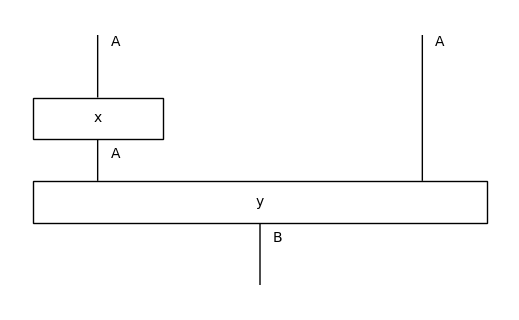

In [5]:
x = Box('x', A, A)
y = Box('y', A @ A, B)

diagram = x @ Id(A) >> y
print(repr(diagram))
diagram.draw(figsize=(5, 3))

In [6]:
t = A @ B @ C

print(t)
print(repr(t))

print('Indexing:', t[0])
print(f'Slicing:', t[1:])
print(f'Reversing:', t[::-1])

A @ B @ C
Ty(A) @ Ty(B) @ Ty(C)
Indexing: A
Slicing: B @ C
Reversing: C @ B @ A


|Ty() @ [x; Ty(A) -> Ty(A)] @ Ty(A)| >> |Ty() @ [y; Ty(A) @ Ty(A) -> Ty(B)] @ Ty()|
Indexing: |Ty() @ [x; Ty(A) -> Ty(A)] @ Ty(A)|
Slicing: |Ty() @ [y; Ty(A) @ Ty(A) -> Ty(B)] @ Ty()|
Reversing (dagger): |Ty() @ [y†; Ty(B) -> Ty(A) @ Ty(A)] @ Ty()| >> |Ty() @ [x†; Ty(A) -> Ty(A)] @ Ty(A)|

Dagger operation:


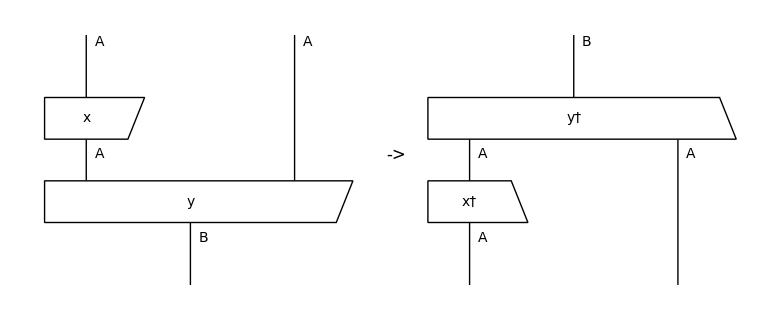

In [7]:
print(diagram)
print(f'Indexing:', diagram[0])
print(f'Slicing:', diagram[1:])
print(f'Reversing (dagger):', diagram[::-1])

from lambeq.backend.drawing import draw_equation

print('\nDagger operation:')
# boxes are drawn as trapeziums to demonstrate the reflection along the horizontal axis
draw_equation(diagram, diagram[::-1], symbol='->', figsize=(8, 3), asymmetry=0.2)

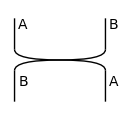

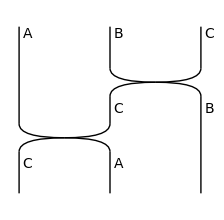

In [8]:
from lambeq.backend.grammar import Diagram, Swap

Swap(A, B).draw(figsize=(1, 1), draw_as_pregroup=False)
Diagram.swap(A @ B, C).draw(figsize=(2, 2), draw_as_pregroup=False)

## Rigid monoidal categories

A *rigid category* is a monoidal category where every object $A$ has a *left adjoint* $A^l$ and *right adjoint* $A^r$. The left adjoint of the right adjoint of a type is equal to the type itself, and vice versa: $(A^r)^l = A = (A^l)^r$

In [9]:
from lambeq.backend.grammar import Box, Id, Ty

A = Ty('A')

print(A.l, 'is represented as', repr(A.l))
print(A.r, 'is represented as', repr(A.r))

assert A.r.l == A == A.l.r

A.l is represented as Ty(A).l
A.r is represented as Ty(A).r


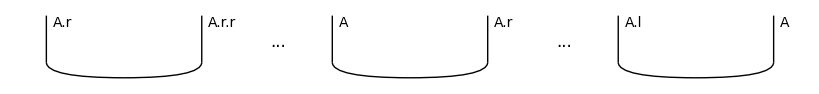

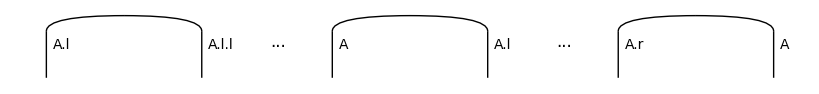

In [10]:
from lambeq.backend.grammar import Cap, Cup


draw_equation(Cup(A.r, A.r.r), Cup(A, A.r), Cup(A.l, A), symbol='...', figsize=(8, 1))
draw_equation(Cap(A.l, A.l.l), Cap(A, A.l), Cap(A.r, A), symbol='...', figsize=(8, 1))

posx and posy should be finite values
posx and posy should be finite values


Snake Equations - For any object A :


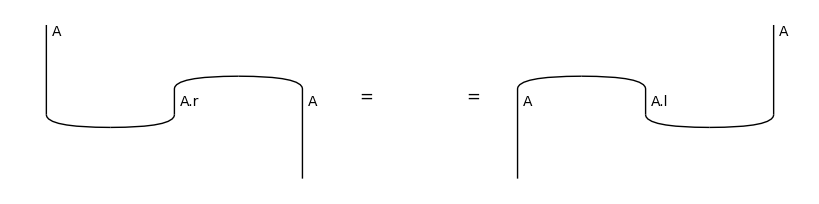

In [11]:
snake1 = Id(A) @ Cap(A.r, A) >> Cup(A, A.r) @ Id(A)
snake2 = Cap(A, A.l) @ Id(A) >> Id(A) @ Cup(A.l, A)

assert snake1.normal_form() == Id(A) == snake2.normal_form()
print('Snake Equations - For any object', A, ':')
draw_equation(snake1, Id(A), snake2, figsize=(8, 2))

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


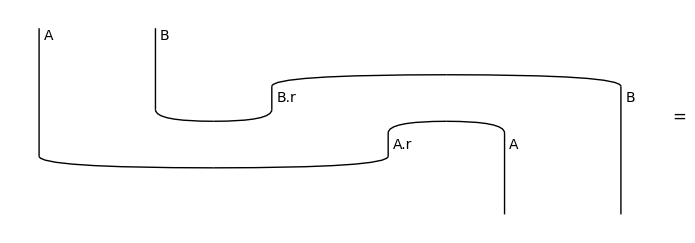

In [12]:
from lambeq.backend.grammar import Diagram

A, B = Ty('A'), Ty('B')

nested_cup = Diagram.cups(A @ B, (A @ B).r)
nested_cap = Diagram.caps((A @ B).r, A @ B)

nested_snake = Id(A @ B) @ nested_cap >> nested_cup @ Id(A @ B)

assert nested_snake.normal_form() == Id(A @ B)
draw_equation(nested_snake, nested_snake.normal_form())